In [1]:
import os
import sys
import time
import pickle
import joblib
import numpy as np
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = np.array(x_train, dtype=float)  # ファイルサイズを大きくするため無駄に型変換(int->float)
x_train_size = sys.getsizeof(eval("x_train")) / (1024*1024)
print("memory size of X: {} Mb".format(round(x_train_size,1)))

memory size of X: 1171.9 Mb


In [3]:
dump_times = []
for cmp in range(10):
    t0 = time.time()
    with open("x_train_{}.joblib".format(cmp), mode="wb") as f:
        joblib.dump(x_train, f, compress=cmp)
    dump_time = round(time.time() - t0, 1)
    dump_times.append(dump_time)
    print("compress {}: {}[.sec]".format(cmp, dump_time))

compress 0: 3.5[.sec]
compress 1: 11.6[.sec]
compress 2: 13.6[.sec]
compress 3: 21.6[.sec]
compress 4: 18.5[.sec]
compress 5: 27.5[.sec]
compress 6: 60.7[.sec]
compress 7: 83.8[.sec]
compress 8: 262.2[.sec]
compress 9: 844.9[.sec]


In [6]:
def getsize_filepath(path, filename):
    file_size = round(os.path.getsize(path)/(1024*1024),1)
    print("{}: {} Mb".format(filename, file_size))
    return file_size

file_sizes = []
for cmp in range(10):
    file_size = getsize_filepath("x_train_{}.joblib".format(cmp), "compress {}".format(cmp))
    file_sizes.append(file_size)

compress 0: 1171.9 Mb
compress 1: 248.6 Mb
compress 2: 237.0 Mb
compress 3: 225.0 Mb
compress 4: 213.7 Mb
compress 5: 207.0 Mb
compress 6: 198.6 Mb
compress 7: 196.9 Mb
compress 8: 194.6 Mb
compress 9: 192.4 Mb


In [7]:
load_times = []
for cmp in range(10):
    t0 = time.time()
    with open("x_train_{}.joblib".format(cmp), mode="rb") as f:
        x_train = joblib.load(f)
    load_time = round(time.time() - t0, 1)
    load_times.append(load_time)
    print("compress {}: {}[.sec]".format(cmp, load_time))

compress 0: 9.3[.sec]
compress 1: 5.3[.sec]
compress 2: 4.7[.sec]
compress 3: 4.6[.sec]
compress 4: 4.5[.sec]
compress 5: 4.2[.sec]
compress 6: 4.1[.sec]
compress 7: 4.3[.sec]
compress 8: 4.3[.sec]
compress 9: 4.3[.sec]


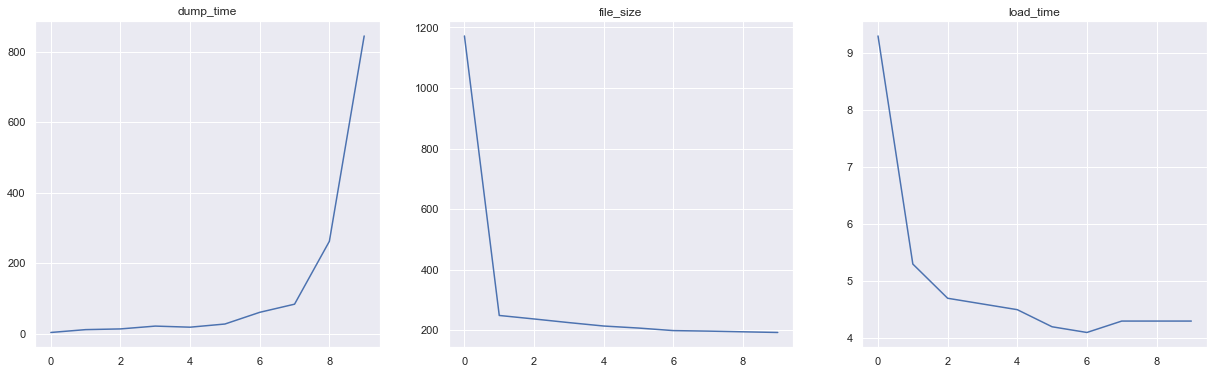

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(1, 3, figsize=(21,6))
sns.lineplot(list(range(10)), dump_times, ax=ax[0])
sns.lineplot(list(range(10)), file_sizes, ax=ax[1])
sns.lineplot(list(range(10)), load_times, ax=ax[2])
ax[0].set_title("dump_time")
ax[1].set_title("file_size")
ax[2].set_title("load_time")
plt.show()

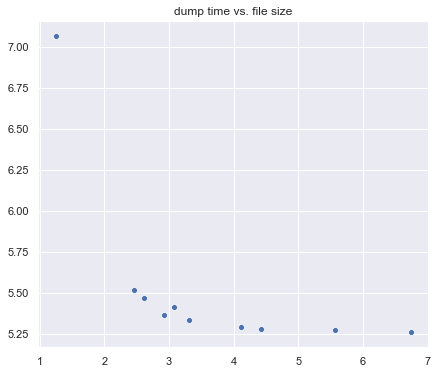

In [20]:
plt.figure(figsize=(7,6))
sns.scatterplot(np.log(dump_times), np.log(file_sizes))
plt.title("dump time vs. file size")
plt.show()

---

In [8]:
joblib.dump([dump_times, file_sizes, load_times], "dumptime_filesize_loadtime.joblib", compress=3)

['dumptime_filesize_loadtime.joblib']